 Implement the k-Nearest Neighbors (KNN) algorithm for 3 classes, 
 for example: 🍎 Apple, 🍌 Banana, 🍉 Watermelon.


<img src="apple.jpg" width="550">
<img src="watermelone.jpg" width="215">

---

- Apple width = 4.5cm
- Apple length = 6cm
---
- Banana width 5cm
- Banana length 9cm
---
- Watermelon width 17cm
- Watermelon length 22cm

#### 🍎=0
#### 🍌=1
#### 🍉=2

## Import Dependencies

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## Generate Our Random Data

In [2]:
n: int = 150

apple_width: float = np.random.normal(4.5, 1., n)
apple_length: float = np.random.normal(6., 1., n)

banana_width: float = np.random.normal(5., 1., n)
banana_length: float = np.random.normal(9., 1., n)

watermelon_width: float = np.random.normal(17., 1., n)
watermelon_length: float = np.random.normal(22., 1., n)

In [3]:
width = np.concatenate((apple_width, banana_width, watermelon_width))
length = np.concatenate((apple_length, banana_length, watermelon_length))

## Plot Our Random Data

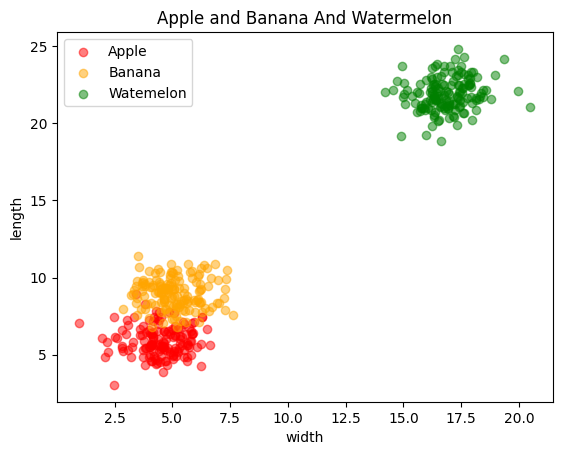

In [4]:
plt.scatter(apple_width, apple_length, c='red', marker='o', alpha= 0.5)
plt.scatter(banana_width, banana_length, c='orange', marker='o', alpha= 0.5)
plt.scatter(watermelon_width, watermelon_length, c='green', marker='o', alpha= 0.5)
plt.title('Apple and Banana And Watermelon')
plt.legend(['Apple', 'Banana', 'Watemelon'])
plt.xlabel('width')
plt.ylabel('length')

plt.show()

## Define Our Train Data And Targets

In [5]:
x_train: np.ndarray = np.array([width, length]).T
x_train

array([[ 2.52228492,  6.12732953],
       [ 4.06959044,  4.58819969],
       [ 4.32904672,  4.64778402],
       [ 5.32955953,  5.78264343],
       [ 4.03566699,  5.00311653],
       [ 3.9959484 ,  6.58738554],
       [ 4.90381221,  5.16560193],
       [ 6.26738565,  7.45330081],
       [ 4.17208122,  6.13018725],
       [ 4.0902688 ,  5.647616  ],
       [ 3.09551065,  6.94931281],
       [ 4.04050382,  5.50074931],
       [ 3.74949361,  4.87025671],
       [ 3.97490691,  5.50692802],
       [ 5.03224173,  6.58919071],
       [ 5.64978183,  4.87793965],
       [ 5.62741013,  4.59540163],
       [ 4.61884931,  5.59500854],
       [ 4.8846239 ,  6.37025372],
       [ 4.63223015,  6.55730849],
       [ 5.33646945,  6.20794165],
       [ 3.99675129,  4.83854906],
       [ 3.87554681,  5.42205745],
       [ 4.62815835,  5.74646174],
       [ 4.48952526,  5.53825001],
       [ 4.59622941,  5.47040088],
       [ 6.2886588 ,  7.42112424],
       [ 4.71502812,  6.35693336],
       [ 5.07736778,

### Create Our Targets

In [6]:
y_apples: np.ndarray = np.zeros(n, dtype='int')
y_banana: np.ndarray = np.ones(n, dtype='int')
y_watermelon: np.ndarray = np.ones(n, dtype='int') * 2

In [7]:
y_train = np.concatenate((y_apples, y_banana, y_watermelon))
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

## KNN

In [8]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [9]:
new_fruit = np.array([14, 17])
distances: list = [euclidean_distance(new_fruit, x) for x in x_train]
distances

[15.809899006969083,
 15.895465419483509,
 15.6877205732384,
 14.177645304074804,
 15.595292408789327,
 14.439653331614341,
 14.926272475759182,
 12.28547069192274,
 14.654037562004392,
 15.06915376017309,
 14.829841566703044,
 15.212637196838024,
 15.880917906992087,
 15.25100636002165,
 13.740656404511935,
 14.719731332353252,
 14.965771680405929,
 14.767525810376878,
 14.002913535495965,
 14.028717610714503,
 13.839266058482051,
 15.746932198114347,
 15.380289533856255,
 14.64491513171711,
 14.893651087517789,
 14.878257864759176,
 12.29713966449262,
 14.123936076016397,
 12.906527240411984,
 13.842496155838326,
 14.934054839839309,
 15.83678072643834,
 16.274999381723728,
 12.957249327914539,
 15.066503312452866,
 15.455245897045891,
 14.683422864191682,
 13.72962504609635,
 14.018227648481606,
 13.82857106238434,
 14.600013752698244,
 13.477710370665115,
 14.103581730566713,
 14.616473151134855,
 13.55123452809209,
 13.163436552419801,
 14.965080369687263,
 14.370119288250914,
 15

In [10]:
n_neighbors: int = 7

In [11]:
nearest_neighbors = np.argsort(distances)[:n_neighbors]
results = np.bincount(y_train[nearest_neighbors])
results

array([0, 0, 7], dtype=int64)

In [12]:
y_pred: int = np.argmax(results)
if y_pred == 0:
    print('🍎 Apple 🍎')
elif y_pred == 1:
    print('🍌 Banana 🍌')
else:
    print('🍉 Watermelon 🍉')

🍉 Watermelon 🍉
